# Normalization
1. It is a technique that are used to  scale the value.
# It consist of following these types
1. **MinMaxScaling**
2. **MeanNormilization**
3. **MaxAbsScaling**
4. **RoboustScaling**

1. Two Popular and most used technique are `MinMaxScaling` and `Roboust Scaling`

# Import Packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df=pd.read_csv('insurance_data.csv',usecols=['age','bmi','bloodpressure','claim'])
df.head(2)

,age,bmi,bloodpressure,claim
0,39.0,23.2,91,1121.87
1,24.0,30.1,87,1131.51


In [3]:
df.isnull().sum()

age              5
bmi              0
bloodpressure    0
claim            0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.describe()

,age,bmi,bloodpressure,claim
count,1335.000000,1335.000000,1335.000000,1335.000000
mean,38.078652,30.654382,94.177528,13298.120517
std,11.102924,6.112894,11.441296,12109.503660
min,18.000000,16.000000,80.000000,1121.870000
25%,29.000000,26.200000,86.000000,4749.060000
50%,38.000000,30.300000,92.000000,9391.350000
75%,47.000000,34.700000,99.000000,16717.010000
max,60.000000,53.100000,140.000000,63770.430000


# Conclussion
1. we see that `mean` is not 0 and `std` is not 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1339
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   bmi            1335 non-null   float64
 2   bloodpressure  1335 non-null   int64  
 3   claim          1335 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 52.1 KB


# Saperate feature and label

In [7]:
featue=df.drop(columns=['claim'])
label=df['claim']

# without apply `MinMaxScaling`

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(featue,label,test_size=0.2,random_state=43)

# fit the model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
pre=model.predict(x_test)
pre

array([25210.48812834,  7270.93497101, 11956.97116118, 13738.28710325,
        6538.73387103, 18709.83969242, 11861.74795936,  5700.53512724,
       14211.79111699, 14501.66161501, 17183.1739239 ,  9001.46306461,
        5315.69406941, 13943.00756334, 13548.2473215 , 19624.47950269,
       34931.15659704, 30707.53914185,  8178.99835482, 11281.10681411,
        8928.25566703, 10209.68151156,  6081.71006062,  6864.21878528,
       17489.81928147, 13763.79964492,  8168.19520216,  5150.36611568,
       11276.23335413, 10606.21256772, 22462.80601454, 10384.87122796,
        9651.35082677,  9713.58856169,  9716.28458546, 23386.30877614,
       15949.73759151, 16028.76271609, 12374.08387768, 11172.46769085,
        9718.81409924, 16294.8627761 , 10217.54852856, 12687.23205981,
        2780.43004569, 29106.55519874, 11925.33370616, 11624.23725304,
        6206.87062802, 16214.96698638, 15023.88800668, 11077.3564547 ,
        5751.29426504, 11884.43633103, 25060.44557251, 15295.94359301,
      

# Score and error

In [13]:
from sklearn.metrics import r2_score,mean_squared_error

In [14]:
error=mean_squared_error(y_test,pre)
error

107736692.03787054

In [15]:
score=r2_score(y_test,pre)
score

0.36737021692761795

# Now Apply the min max Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scale=MinMaxScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [18]:
scale_df=pd.DataFrame(x_train_scale,columns=x_train.columns)
scale_df

,age,bmi,bloodpressure
0,0.666667,0.315364,0.050000
1,0.095238,0.390836,0.033333
2,0.952381,0.601078,0.116667
3,0.380952,0.304582,0.150000
4,0.214286,0.401617,0.183333
...,...,...,...
1063,0.071429,0.603774,0.116667
1064,0.380952,0.407008,0.266667
1065,1.000000,0.123989,0.166667
1066,0.714286,0.466307,0.333333


In [19]:
scale_df.describe()

,age,bmi,bloodpressure
count,1068.000000,1068.000000,1068.000000
mean,0.474162,0.393912,0.238109
std,0.267239,0.163874,0.189035
min,0.000000,0.000000,0.000000
25%,0.261905,0.274933,0.100000
50%,0.452381,0.385445,0.216667
75%,0.672619,0.501348,0.316667
max,1.000000,1.000000,1.000000


# Conclussion
1. we see that `mean` is  0 and `std` is close to 1

# Fit the model again

In [20]:
model=LinearRegression()
model.fit(x_train_scale,y_train)

LinearRegression()

In [21]:
pre=model.predict(x_test_scale)
pre

array([25210.48812834,  7270.93497101, 11956.97116118, 13738.28710325,
        6538.73387103, 18709.83969242, 11861.74795936,  5700.53512724,
       14211.79111699, 14501.66161501, 17183.1739239 ,  9001.46306461,
        5315.69406941, 13943.00756334, 13548.2473215 , 19624.47950269,
       34931.15659704, 30707.53914185,  8178.99835482, 11281.10681411,
        8928.25566703, 10209.68151156,  6081.71006062,  6864.21878528,
       17489.81928147, 13763.79964492,  8168.19520216,  5150.36611568,
       11276.23335413, 10606.21256772, 22462.80601454, 10384.87122796,
        9651.35082677,  9713.58856169,  9716.28458546, 23386.30877614,
       15949.73759151, 16028.76271609, 12374.08387768, 11172.46769085,
        9718.81409924, 16294.8627761 , 10217.54852856, 12687.23205981,
        2780.43004569, 29106.55519874, 11925.33370616, 11624.23725304,
        6206.87062802, 16214.96698638, 15023.88800668, 11077.3564547 ,
        5751.29426504, 11884.43633103, 25060.44557251, 15295.94359301,
      

In [22]:
mean_squared_error(y_test,pre)

107736692.03787057

In [23]:
score2=r2_score(y_test,pre)
score2

0.36737021692761784

# Check the difference b/2 `score` and `score2`

In [25]:
print("Difference b/w befroe Scaling and after Scaling is: ",score-score2)

Difference b/w befroe Scaling and after Scaling is:  1.1102230246251565e-16


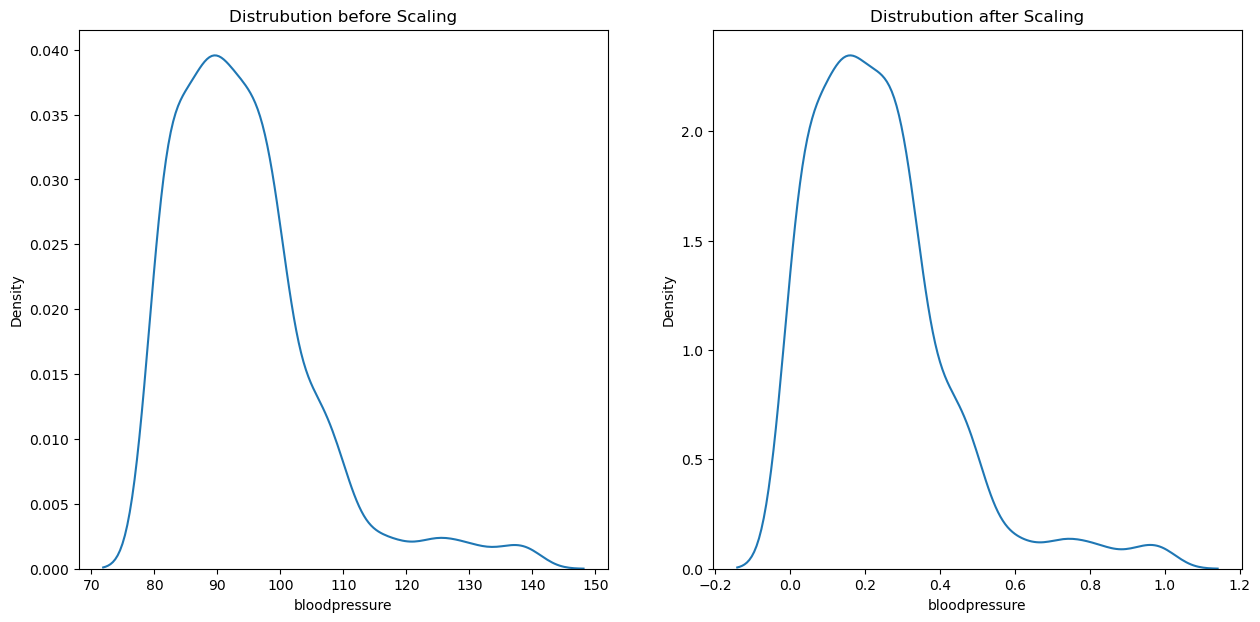

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title("Distrubution before Scaling")
sns.kdeplot(df['bloodpressure'],ax=ax1)

ax2.set_title("Distrubution after Scaling")
sns.kdeplot(scale_df['bloodpressure'],ax=ax2)
plt.show()

# Conclussion
1. There is not difference before and after scaling except scale